In [63]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sb 

In [64]:
df=pd.read_csv('HR_comma_sep.csv')
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [65]:
left=df[df.left==1]
left.shape


(3571, 10)

In [66]:
retained =df[df.left==0]
retained.shape

(11428, 10)

In [67]:
numeric_cols=df.select_dtypes(include=['float64','int64']).columns

numeric_mean=df.groupby('left')[numeric_cols].mean()

print(numeric_mean)

      satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  left  \
left                                                                  
0               199.060203            3.380032       0.175009   0.0   
1               207.419210            3.876505       0.047326   1.0   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321  


Exploratory data anaysis reveals that satisfaction level ,average monthly hours and promotion in last 5 years have played a major role 

<Axes: xlabel='salary'>

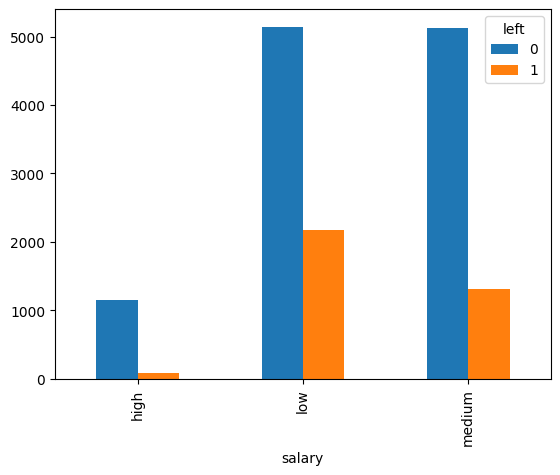

In [68]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<Axes: xlabel='left'>

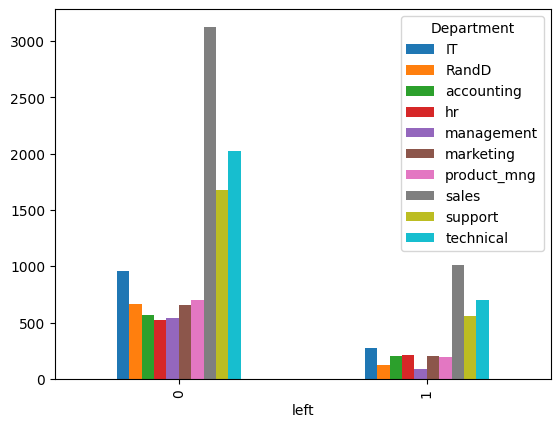

In [69]:
pd.crosstab(df.left,df.Department).plot(kind='bar')

In [70]:
df=pd.concat([df,pd.get_dummies(df.salary)],axis='columns')
df=df.drop(['salary','low','Department'],axis='columns')



In [71]:
X = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'high', 'medium']]
Y=df['left']


In [72]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [73]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [74]:
model.predict(x_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [75]:
model.score(x_test,y_test)

0.772